# Chapter 2 Getting Started with Python (Part 1)

In this chapter, we focus on the key operations used in data analysis through Python, building on general programming concepts introduced previously. Python is a versatile language widely utilized in data science. For an introduction to Python, see McKinney (2022). There are also numerous books and online platforms for learning Python programming. Some popular websites include Coursera, CognitiveClass.ai, and DataCamp, which offer courses for learners at various levels from beginner to advanced.

## 2.1 Reading a local data file

In any data science project, the first step is often loading a dataset. One widely used file format for storing tabular data is CSV (comma-separated values). For example, the file `List_SP500.csv` contains details about the 500 companies included in the S&P 500 Index. Below is an example of how to load this file using the `read_csv()` function from the `Pandas` library.

The `Pandas` library is a powerful tool for various aspects of data analysis, including reading data, cleaning and transforming it, and creating visualizations. In the following code snippet, we first import pandas, then use the `read_csv()` function to load the dataset into a DataFrame, and finally, we review the first five rows of the DataFrame using the `head()` method




import pandas as pd
splist = pd.read_csv("List_SP500.csv")
splist.head()

The next step is to use the DataFrame’s `info()` method to quickly examine the dataset's structure. This method provides an overview of the data, including the total number of rows, column names, data types, and the count of non-null values for each column.

In [2]:
splist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


For example, calling `splist.info()` may reveal that most columns are interpreted as the generic `object` type. While this can accommodate numbers, strings, or dates, it is not particularly efficient. Therefore, it’s recommended to assign more precise data types (for instance, converting date columns to `datetime`) either during CSV import or after reading the data. In addition, the `info()` method displays each variable present in the DataFrame, such as `Symbol`, `Security`, `GICS` `Sector`, `Headquarters Location`, `Date added`, and `Founded`.

A column worth converting is `Date added`, which may initially be read as text rather than a proper date type. We can address this by using the `to_datetime()` function in pandas and specifying the data format (in this case, year-month-day). The following example shows how to make this change:


In [3]:
splist['Date added'] = pd.to_datetime(splist['Date added'], format="%Y-%m-%d")
splist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Symbol                 503 non-null    object        
 1   Security               503 non-null    object        
 2   GICS Sector            503 non-null    object        
 3   GICS Sub-Industry      503 non-null    object        
 4   Headquarters Location  503 non-null    object        
 5   Date added             503 non-null    datetime64[ns]
 6   CIK                    503 non-null    int64         
 7   Founded                503 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.6+ KB


This ensures that the column is treated as a date rather than a string.

In pandas (and NumPy), `datetime64[ns]` is a data type used to store date and time values with nanosecond precision.
- `datetime64` indicates a 64-bit representation of date/time information.
- `[ns]` specifies the resolution (or frequency) is at the nanosecond level.

This format allows pandas to handle very high-precision timestamps for time-series data.

Let’s consider another example: the S&P 500 Index with the dataset obtained from [Yahoo Finance](https://archive.ics.uci.edu/dataset/320/student+performance).

In [4]:
sp = pd.read_csv("GSPC.csv")
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Range
0,1995-01-03,459.209991,459.269989,457.200012,459.109985,459.109985,262450000,0.452751
1,1995-01-04,459.130005,460.720001,457.559998,460.709991,460.709991,319510000,0.690621
2,1995-01-05,460.730011,461.299988,459.750000,460.339996,460.339996,309050000,0.337137
3,1995-01-06,460.380005,462.489990,459.470001,460.679993,460.679993,308070000,0.657277
4,1995-01-09,460.670013,461.769989,459.739990,460.829987,460.829987,278790000,0.441554


These files from Yahoo Finance usually follow a standard structure: a column for the date plus six columns containing the opening price, closing price, daily high, daily low, adjusted closing price, and trading volume. The `sp.info()` method below shows the object’s structure.

In [5]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7306 non-null   object 
 1   Open       7306 non-null   float64
 2   High       7306 non-null   float64
 3   Low        7306 non-null   float64
 4   Close      7306 non-null   float64
 5   Adj Close  7306 non-null   float64
 6   Volume     7306 non-null   int64  
 7   Range      7306 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 456.8+ KB


In this case all variables are classified as numerical except for the `Data`.

##  2.2 Saving data files

Beyond importing files, we can also store data locally. In the following example, we add a new column to the `sp` DataFrame to represent the **range (%)**
The **range (%)** is one of several measures of volatility and it is defined as the percentage spread between the highest and lowest intra-day price experience by the asset. Specifically: 

$$
\text{Range}(\%) = 100 \times \frac{\text{High} - \text{Low}}{\text{Low}}
$$

This calculates how much the price moved from the low to the high, as a percentage of the low price. Different analysts might use close or average price in the denominator.

In [6]:
sp['Date'] = pd.to_datetime(sp['Date'], format="%Y-%m-%d")
# create a new variable called range 
sp['Range'] = 100 * (sp['High'] - sp['Low']) / sp['Low']
sp.to_csv("indexdf.csv")

The above code converts the `Date` column to a `datetime` format. Next, it creates a new variable named `Range`, calculated as the percentage difference between `High` and `Low` relative to `Low`.Finally, the updated DataFrame is saved locally under `indexdf.csv`.

In [7]:
#sp.head()
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7306 non-null   datetime64[ns]
 1   Open       7306 non-null   float64       
 2   High       7306 non-null   float64       
 3   Low        7306 non-null   float64       
 4   Close      7306 non-null   float64       
 5   Adj Close  7306 non-null   float64       
 6   Volume     7306 non-null   int64         
 7   Range      7306 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 456.8 KB


## 2.3 Time series objects

In this course we will mainly deal exclusively with time series and it is thus convenient to explicitly define our pandas data frame as ordered in time. This is done by using the `set_index()` method with the relevant time variable—in our case, the `Date` column. 

Once you call `sp.set_index('date', inplace=True)`, that date column will no longer appear among the DataFrame’s columns because it now serves as the index for sorting and referencing rows chronologically.

In [8]:
sp.set_index('Date', inplace = True)

In [9]:
sp.head()

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
1995-01-03,459.209991,459.269989,457.200012,459.109985,459.109985,262450000,0.452751
1995-01-04,459.130005,460.720001,457.559998,460.709991,460.709991,319510000,0.690621
1995-01-05,460.730011,461.299988,459.750000,460.339996,460.339996,309050000,0.337137
1995-01-06,460.380005,462.489990,459.470001,460.679993,460.679993,308070000,0.657277
1995-01-09,460.670013,461.769989,459.739990,460.829987,460.829987,278790000,0.441554


Sometimes, you may need to change the sampling frequency of a time series—for instance, converting the daily S&P 500 data to monthly intervals. Pandas simplifies this process through the `resample()` function, where you specify a new frequency and an aggregation method. Below is an example that averages the variables on a monthly basis:

In [10]:
sp = sp.resample('M').mean()
sp.head()
#sp.loc['1995-02-28']
#sp.loc["1995-02-28":"1996-03-30"]

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
1995-01-31,464.721908,466.378091,463.334285,465.250000,465.250000,3.262886e+08,0.657192
1995-02-28,481.031054,483.138950,480.040527,481.924737,481.924737,3.331632e+08,0.646106
1995-03-31,492.570439,494.352174,490.860870,493.153047,493.153047,3.388000e+08,0.711423
1995-04-30,507.215790,508.892633,505.658950,507.905791,507.905791,3.319489e+08,0.639590
1995-05-31,522.969097,525.441365,520.924097,523.813640,523.813640,3.434405e+08,0.866934


## 2.4 Reading an online data file 

Numerous sources offer economic and financial data, including **Yahoo Finance** and the **Federal Reserve Economic Data (FRED)** website. Accessing data from such platforms allows for straightforward updates to existing analyses and documents (like these notes). Typically, data retrieval is handled via specialized libraries that include built-in functions for downloads. An alternative approach, however, involves defining a URL and manually downloading the file, as illustrated below:

In [11]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?chart_type=line&recession_bars=on&lg_scales=&bgcolor=%23e1e9f0&graph_bgcolor=%23ffffff&fo=Open+Sans&ts=12&tts=12&txtcolor=%23444444&show_legend=yes&show_axis_titles=yes&drp=0&cosd=1999-01-01&coed=2024-08-01&height=450&stacking=&range=&mode=fred&id=EXUSEU&transformation=lin&nd=1999-01-01&ost=-99999&oet=99999&lsv=&lev=&mma=0&fml=a&fgst=lin&fgsnd=2009-06-01&fq=Monthly&fam=avg&vintage_date=&revision_date=&line_color=%234572a7&line_style=solid&lw=2&scale=left&mark_type=none&mw=2&width=1168'
data = pd.read_csv(url)
data

,observation_date,EXUSEU
0,1999-01-01,1.1591
1,1999-02-01,1.1203
2,1999-03-01,1.0886
3,1999-04-01,1.0701
4,1999-05-01,1.0630
...,...,...
303,2024-04-01,1.0724
304,2024-05-01,1.0810
305,2024-06-01,1.0763
306,2024-07-01,1.0847


When you call `pd.read_csv(url)`, pandas fetches the CSV from that address and creates a DataFrame named `data` containing the retrieved economic data. Essentially, you’re reading FRED’s CSV output into Python directly via the URL. 

The url above refers to the ticker `EXUSEU` (USD-EURO exchange rate) from January 1999 until the most recent observation at the monthly frequency. Although passing the `read_csv()` function a url is possible, most often we use libraries such as the one discussed below.

### 2.4.1 Yahoo Finance

Yahoo Finance provides free access to stock price data, and a popular way to retrieve this information is through the `yfinance` library. Simply supply the ticker symbols and date range you wish to download. For instance, the following code fetches historical data for the S&P 500 (`^GSPC`) and the Dow Jones Industrial Average (`^DJI`), from January 1990 to the most current observation:

In [5]:
# !pip install yfinance
import yfinance as yf
data = yf.download(['^GSPC','^DJI'], start = "1990-01-01", progress = False)
data

Price              Close                       High               \
Ticker              ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
1990-01-02           NaN   359.690002           NaN   359.690002   
1990-01-03           NaN   358.760010           NaN   360.589996   
1990-01-04           NaN   355.670013           NaN   358.760010   
1990-01-05           NaN   352.200012           NaN   355.670013   
1990-01-08           NaN   353.790009           NaN   354.239990   
...                  ...          ...           ...          ...   
2025-02-03  44421.910156  5994.569824  44594.539062  6022.129883   
2025-02-04  44556.039062  6037.879883  44597.710938  6042.479980   
2025-02-05  44873.281250  6061.479980  44886.878906  6062.859863   
2025-02-06  44747.628906  6083.569824  44966.628906  6084.029785   
2025-02-07  44303.398438  6025.990234  44857.109375  6101.279785   

Price                Low                       Open                    Volume  \
Ticker              ^DJI        ^GSPC          ^DJI        ^GSPC         ^DJI   
Date                                                                            
1990-01-02           NaN   351.980011           NaN   353.399994          NaN   
1990-01-03           NaN   357.890015           NaN   359.690002          NaN   
1990-01-04           NaN   352.890015           NaN   358.760010          NaN   
1990-01-05           NaN   351.350006           NaN   355.670013          NaN   
1990-01-08           NaN   350.540009           NaN   352.200012          NaN   
...                  ...          ...           ...          ...          ...   
2025-02-03  43879.058594  5923.930176  44268.148438  5969.649902  712890000.0   
2025-02-04  44328.519531  5990.870117  44469.460938  5998.140137  561360000.0   
2025-02-05  44352.988281  6007.060059  44563.628906  6020.450195  552040000.0   
2025-02-06  44545.269531  6046.830078  44949.191406  6072.220215  542250000.0   
2025-02-07  44279.781250  6019.959961  44762.570312  6083.129883  552510000.0   

Price                   
Ticker           ^GSPC  
Date                    
1990-01-02   162070000  
1990-01-03   192330000  
1990-01-04   177000000  
1990-01-05   158530000  
1990-01-08   140110000  
...                ...  
2025-02-03  4797210000  
2025-02-04  4410160000  
2025-02-05  4756250000  
2025-02-06  4847120000  
2025-02-07  4766900000  

[8842 rows x 10 columns]

Here, `data` is a DataFrame organized by ticker (if more than one is provided). Accessing the adjusted closing price columns, for example, is straightforward:

In [7]:
data['Adj Close']

KeyError: 'Adj Close'

While the above sample uses two assets, this method easily scales to more tickers. The example below reads the S&P 500 constituent list, takes the first 10 symbols, and downloads data from January 2010 onward:

In [14]:
splist = pd.read_csv("List_SP500.csv")

# Select the first 9 (or 10) tickers as a list
ticker_list = splist['Symbol'].head(9).tolist()
data = yf.download(ticker_list, start="2010-01-01", progress=False)

The first three rows of the `Adj Close` variable is given below:

In [15]:
data['Adj Close'].head(3)

,ABBV,ABT,ACN,ADBE,AES,AFL,AMD,AOS,MMM
Date,,,,,,,,,
2010-01-04,NaN,18.665766,31.941790,37.090000,9.370146,16.492298,9.70,5.937268,43.783871
2010-01-05,NaN,18.514956,32.139202,37.700001,9.274180,16.970745,9.71,5.861405,43.509617
2010-01-06,NaN,18.617779,32.480858,37.619999,9.178219,17.119818,9.57,5.864067,44.126667


### 2.4.2 FRED

### 2.4.3 Quandl

## 2.5 Transforming the data

Creating new variables in Python is straightforward. When applying mathematical transformations, such as logarithms, the `NumPy` library is essential. Additionally, working with time series data often requires creating lagged variables.  The `shift(k)` function in Pandas shifts the time index by `k` periods.

Let $P_t$ represent the price at time $t$. We can define: 

1. Simple Return:
$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} -1
$$

2. Logarithmic Return:

$$
r_t = ln (\frac{P_t}{P_{t-1}})
$$

These returns can be calculated in Python as follows:

In [16]:
import numpy as np

GSPC = yf.download("^GSPC", start="1990-01-01", progress=False)
GSPC


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2025-01-16,5963.609863,5964.689941,5930.720215,5937.339844,5937.339844,4285810000
2025-01-17,5995.399902,6014.959961,5978.439941,5996.660156,5996.660156,4366830000
2025-01-21,6014.120117,6051.509766,6006.879883,6049.240234,6049.240234,4702920000


In [17]:
# Calculate Simple Returns
GSPC['ret_simple'] = GSPC['Adj Close'].pct_change()
GSPC

,Open,High,Low,Close,Adj Close,Volume,ret_simple
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,-0.002586
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,-0.008613
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,-0.009756
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,0.004514
...,...,...,...,...,...,...,...
2025-01-16,5963.609863,5964.689941,5930.720215,5937.339844,5937.339844,4285810000,-0.002113
2025-01-17,5995.399902,6014.959961,5978.439941,5996.660156,5996.660156,4366830000,0.009991
2025-01-21,6014.120117,6051.509766,6006.879883,6049.240234,6049.240234,4702920000,0.008768


In [18]:
# Calculate Logarithmic Returns using NumPy
GSPC['ret_log'] = np.log(GSPC['Adj Close']/GSPC['Adj Close'].shift(1))
GSPC
#GSPC.dropna()
#GSPC.iloc[1:]

,Open,High,Low,Close,Adj Close,Volume,ret_simple,ret_log
Date,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,-0.002586,-0.002589
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,-0.008613,-0.008650
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,-0.009756,-0.009804
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,0.004514,0.004504
...,...,...,...,...,...,...,...,...
2025-01-16,5963.609863,5964.689941,5930.720215,5937.339844,5937.339844,4285810000,-0.002113,-0.002115
2025-01-17,5995.399902,6014.959961,5978.439941,5996.660156,5996.660156,4366830000,0.009991,0.009941
2025-01-21,6014.120117,6051.509766,6006.879883,6049.240234,6049.240234,4702920000,0.008768,0.008730


Creating new variables by transforming existing variables in a DataFrame is straightforward. In some cases, it's useful to create variables that represent the year, month, or day of the observation, especially for grouping purposes (as demonstrated later). In the example below, we create the following variables:
- range: Intra-day range, defined as the log-difference of the highest and lowest intra-day prices.
- ret.o2c: Open-to-close return.
- ret.c2c: Close-to-close return.
- year: The year of the observation.
- month: The month of the observation (numeric).
- day: The day of the month (numeric).
- wday: The day of the week (as a string).

In [19]:
GSPC['range'] = 100 * np.log(GSPC['High'] / GSPC['Low'])
GSPC['ret.o2c'] = 100 * np.log(GSPC['Close'] / GSPC['Open'])
GSPC['ret.c2c'] = 100 * np.log(GSPC['Adj Close'] / GSPC['Adj Close'].shift(1))
GSPC['year'] = pd.DatetimeIndex(GSPC.index).year
GSPC['month'] = pd.DatetimeIndex(GSPC.index).month
GSPC['day'] = pd.DatetimeIndex(GSPC.index).day
GSPC['wday'] = pd.DatetimeIndex(GSPC.index).day_name()

In [20]:
GSPC.head(10)

,Open,High,Low,Close,Adj Close,Volume,ret_simple,ret_log,range,ret.o2c,ret.c2c,year,month,day,wday
Date,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,NaN,NaN,2.166817,1.764201,NaN,1990,1,2,Tuesday
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,-0.002586,-0.002589,0.751585,-0.258889,-0.258889,1990,1,3,Wednesday
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,-0.008613,-0.008650,1.649723,-0.865030,-0.865030,1990,1,4,Thursday
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,-0.009756,-0.009804,1.222048,-0.980414,-0.980414,1990,1,5,Friday
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,0.004514,0.004504,1.049977,0.450431,0.450431,1990,1,8,Monday
1990-01-09,353.829987,354.170013,349.609985,349.619995,349.619995,155210000,-0.011787,-0.011857,1.295886,-1.196970,-1.185670,1990,1,9,Tuesday
1990-01-10,349.619995,349.619995,344.320007,347.309998,347.309998,175990000,-0.006607,-0.006629,1.527536,-0.662909,-0.662909,1990,1,10,Wednesday
1990-01-11,347.309998,350.140015,347.309998,348.529999,348.529999,154390000,0.003513,0.003507,0.811537,0.350656,0.350656,1990,1,11,Thursday
1990-01-12,348.529999,348.529999,339.489990,339.929993,339.929993,183880000,-0.024675,-0.024985,2.627984,-2.498461,-2.498461,1990,1,12,Friday


A common task when working with datasets is to aggregate data based on predefined groups. For instance, we might want to calculate the average monthly range for each year, as shown in the example below:

In [21]:
GSPC_year = GSPC[['year', 'range']].groupby('year').agg(av_range=('range', 'mean')).reset_index()

The `groupby()` function separates the observations based on the values of the grouping variable (in this case, 'year'). Then, the `agg()` function is applied to each group, performing an operation (such as `mean()`) that results in a scalar value for each group.

To view the last three rows of the aggregated data, you can use:

In [22]:
GSPC_year.tail(3)

,year,av_range
33,2023,1.029442
34,2024,0.901398
35,2025,1.017590


## 2.6 Plotting the data

Python offers several powerful libraries for data visualization, each with its unique strengths:

- `Matplotlib`: A versatile library that provides extensive customization options for creating a wide range of plots. While it offers sophisticated plotting capabilities, it often requires more detailed code to achieve the desired appearance.

- `Seaborn`: Built on top of Matplotlib, Seaborn simplifies the creation of attractive and informative statistical graphics. It comes with many built-in themes and functions that cater to most plotting needs, making it ideal for data exploration and wrangling.

- `Pandas Built-in Plotting`: Pandas DataFrames include convenient methods for quick and easy plotting. These methods are perfect for rapid visualization without the need for extensive customization.

In this section, we'll explore these three visualization options to help you get started with visualizing your data effectively. 

In the code below, we first download from Yahoo Finance data for the S&P 500 Index starting in January 1990 at the daily frequency. We then select the Close column of the pandas data frame and plot it, including some `matplotlib` customization of the axis labels and title.

Using Matplotlib

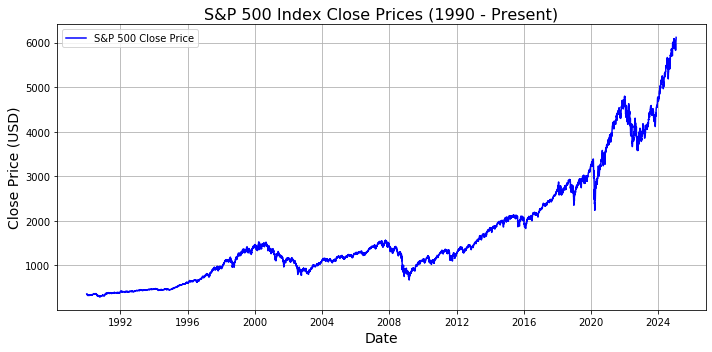

In [23]:
import matplotlib.pyplot as plt 

sp = yf.download("^GSPC", start = "1990-01-01", progress = False)

close_prices = sp['Close']

# Plot the 'Close' Prices with Matplotlib 

plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(close_prices, color='blue', linewidth=1.5, label='S&P 500 Close Price')  # Plot the close prices

# Customize the plot
plt.title('S&P 500 Index Close Prices (1990 - Present)', fontsize=16)      # Add a title
plt.xlabel('Date', fontsize=14)                                            # Label for the x-axis
plt.ylabel('Close Price (USD)', fontsize=14)                               # Label for the y-axis
plt.legend()                                                                # Add a legend
plt.grid(True)                                                              # Show grid lines

plt.tight_layout()                                                          # Adjust layout for better fit
plt.show() 


Using Seaborn

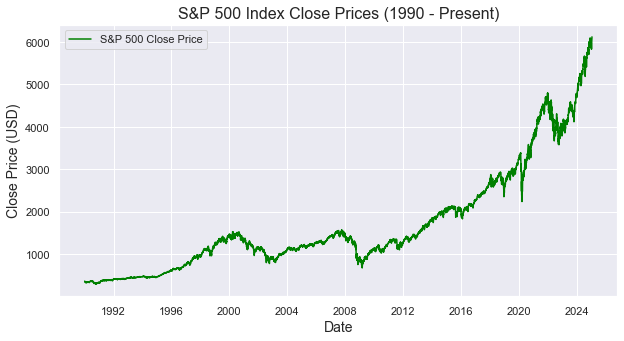

In [24]:
import seaborn as sns

# Set Seaborn theme for better aesthetics
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.lineplot(data=close_prices, label='S&P 500 Close Price', color='green')

plt.title('S&P 500 Index Close Prices (1990 - Present)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.legend()
plt.show()

Using Pandas Built-in Plotting

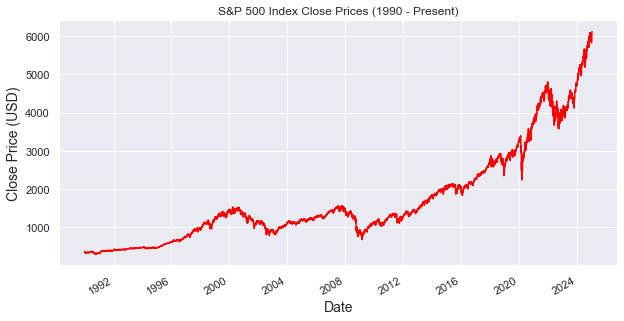

In [25]:
# Plot using pandas' built-in plotting functionality
close_prices.plot(figsize=(10, 5), color='red', linewidth=1.5, title='S&P 500 Index Close Prices (1990 - Present)')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.grid(True)
plt.show()

Macroeconomic and financial variables often exhibit exponential growth trends. To stabilize the variance and linearize these increasing trends, it's common to apply a **logarithmic transformation**. This transformation makes it easier to analyze and visualize the data.

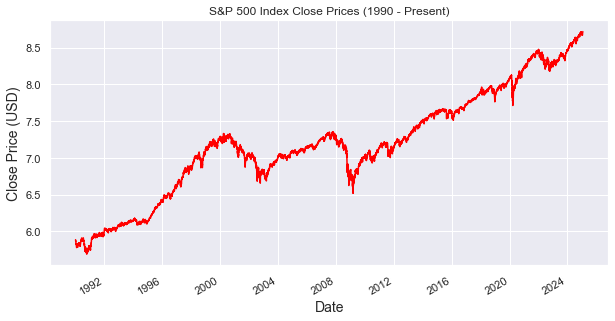

In [26]:
log_close = np.log(sp['Close']) 

log_close.plot(figsize=(10, 5), color='red', linewidth=1.5, title='S&P 500 Index Close Prices (1990 - Present)')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.grid(True)
plt.show()

When analyzing multiple financial variables, such as different stock indices, understanding their co-movement is crucial. Plotting multiple time series on the same graph can lead to overlapping lines, making it difficult to distinguish between them. To address this, plotting each variable in separate panels (subplots) can provide clearer insights.

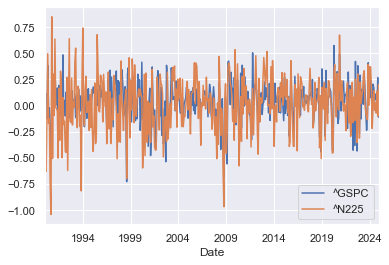

In [27]:
data = yf.download('^GSPC ^N225', start = "1990-01-01", progress = False)
# Calculate daily percentage change and convert to monthly average returns
ret = 100 * data['Adj Close'].pct_change().dropna()
ret = ret.resample('M').mean()
ret.plot()
plt.show()

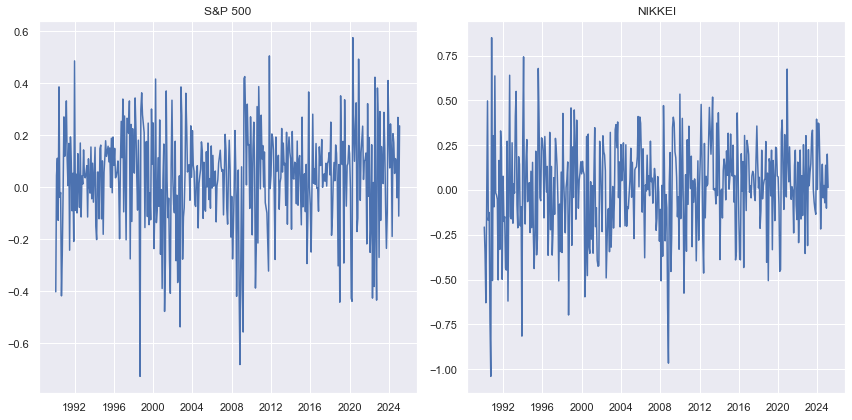

In [28]:
# Initializes a figure object named fig with a canvas size of 12 inches wide and 6 inches tall.
fig = plt.figure(figsize=(12, 6))
# Adds two subplots to the figure:
ax1 = fig.add_subplot(121) # ax1 corresponds to the first subplot (121 means 1 row, 2 columns, and this is the 1st subplot).
ax2 = fig.add_subplot(122)

ax1.plot(ret['^GSPC'])
ax1.set_title("S&P 500")

ax2.plot(ret['^N225'])
ax2.set_title("NIKKEI")

plt.tight_layout() # The tight_layout() ensures the plots and titles are neatly arranged for better readability
plt.show()

In [29]:
# import matplotlib.pyplot as plt
# # Create a figure and subplots with a clearer structure
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # 1, 2: Specifies 1 row and 2 columns for subplots.

# # Plot S&P 500 returns on the first subplot
# ax1.plot(ret['^GSPC'], label='S&P 500', color='blue')
# ax1.set_title("S&P 500 Returns")
# ax1.set_xlabel("Date")
# ax1.set_ylabel("Returns")
# ax1.legend()
# ax1.grid(True)

# # Plot NIKKEI returns on the second subplot
# ax2.plot(ret['^N225'], label='NIKKEI', color='green')
# ax2.set_title("NIKKEI Returns")
# ax2.set_xlabel("Date")
# ax2.set_ylabel("Returns")
# ax2.legend()
# ax2.grid(True)

# # Adjust layout for better spacing
# plt.tight_layout()

# # Display the plots
# plt.show()

The best way to visually assess the dependence between two variables is to draw a scatter plot. 

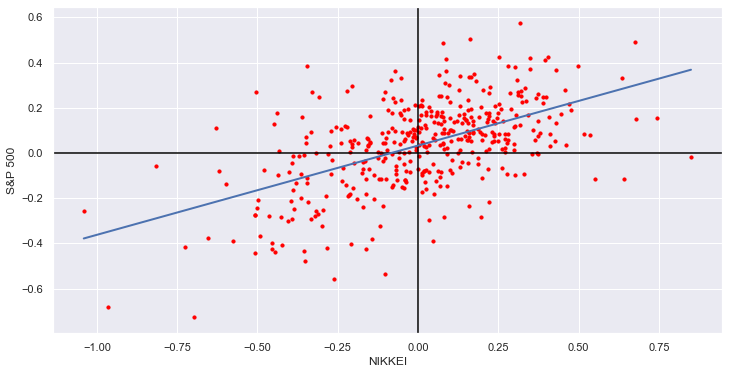

In [30]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(ret['^N225'], ret['^GSPC'], color = "red", s = 10)
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')
plt.xlabel("NIKKEI")
plt.ylabel("S&P 500")

# Uses np.polyfit from NumPy to perform linear regression on the two variables.
# The slope of the line (b1) and the y-intercept (b0) are computed.
b1, b0 = np.polyfit(ret['^N225'], ret['^GSPC'], deg = 1) # deg=1 specifies that we want a linear fit (first-degree polynomial).

# Generates 10 evenly spaced points (xseq) between the minimum and maximum values of ret['^N225'].
xseq = np.linspace(ret['^N225'].min(), ret['^N225'].max(), num=100) 
plt.plot(xseq, b0 + b1 * xseq, '-',lw = 2) # The line style is solid ('-') with a line width (lw) of 2.
plt.show()

In [31]:
# fig, ax = plt.subplots(figsize=(8, 6))

# # Scatter plot for the data
# ax.scatter(ret['^N225'], ret['^GSPC'], color="red", s=10, label="Data Points")

# # Add reference lines at x=0 and y=0
# ax.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
# ax.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

# # Set axis labels
# ax.set_xlabel("NIKKEI Returns")
# ax.set_ylabel("S&P 500 Returns")
# ax.set_title("Scatter Plot with Regression Line")

# # Fit a linear regression line
# b1, b0 = np.polyfit(ret['^N225'], ret['^GSPC'], deg=1)
# xseq = np.linspace(ret['^N225'].min(), ret['^N225'].max(), num=100)

# # Plot the regression line
# ax.plot(xseq, b0 + b1 * xseq, color="blue", linewidth=2, label="Regression Line")

# # Add legend
# ax.legend()

# # Improve layout and display the plot
# plt.tight_layout()
# plt.show()

In [32]:
# plt.plot(GSPC_year['year'], GSPC_year['av_range'], color='magenta')
# plt.xlabel('Year')
# plt.ylabel('Average Range')
# plt.title('Average Range over Years')
# plt.show()

##  2.7 Exploratory data analysis 

The `describe()` method is a first approach that calculates the most relevant statistics for each column of the data frame:

In [33]:
GSPC.describe()
#GSPC['ret_simple'].describe()
#GSPC['ret_simple'].mean()



,Open,High,Low,Close,Adj Close,Volume,ret_simple,ret_log,range,ret.o2c,ret.c2c,year,month,day
count,8831.000000,8831.000000,8831.000000,8831.000000,8831.000000,8.831000e+03,8830.000000,8830.000000,8831.000000,8831.000000,8830.000000,8831.000000,8831.000000,8831.000000
mean,1700.185490,1709.986854,1689.713090,1700.517001,1700.517001,2.503779e+09,0.000386,0.000321,1.243052,0.024490,0.032094,2007.011777,6.531423,15.730268
std,1262.202506,1268.389025,1255.574663,1262.342170,1262.342170,1.843462e+09,0.011355,0.011372,0.910025,1.052039,1.137177,10.122269,3.434207,8.749693
min,295.450012,301.450012,294.510010,295.459991,295.459991,1.499000e+07,-0.119841,-0.127652,0.145641,-9.127244,-12.765220,1990.000000,1.000000,1.000000
25%,909.919983,919.355011,899.474976,909.875000,909.875000,6.828900e+08,-0.004454,-0.004464,0.670053,-0.417306,-0.446435,1998.000000,4.000000,8.000000
50%,1284.390015,1291.920044,1276.290039,1284.910034,1284.910034,2.673040e+09,0.000588,0.000588,1.006160,0.052386,0.058803,2007.000000,7.000000,16.000000
75%,2102.625000,2110.540039,2094.259888,2103.395020,2103.395020,3.854300e+09,0.005713,0.005697,1.521183,0.528747,0.569675,2016.000000,10.000000,23.000000
max,6089.029785,6118.729980,6079.979980,6118.709961,6118.709961,1.145623e+10,0.115800,0.109572,10.904134,10.245736,10.957197,2025.000000,12.000000,31.000000


We might also be interested in estimating summary statistics individually, and some examples are provided below:

In [34]:
#GSPC['ret_simple'].describe()
GSPC['ret_simple'].mean()

0.00038557105168099913

The covariance matrix is calculated as follows:

In [35]:
ret.cov()

,^GSPC,^N225
^GSPC,0.038367,0.028948
^N225,0.028948,0.073301


The elements on the diagonal represent the variances of the returns for each index, while the off-diagonal element indicates the covariance between the two indices. The sample covariance between the S&P 500 and the NIKKEI is 0.03. However, covariance can be difficult to interpret because it depends on the scale of the variables. This is why correlation, which is scaled by the standard deviations of the two variables, is often used. Correlation is bounded between -1 and 1, making it easier to interpret.

The correlation matrix is calculated as follows:

In [36]:
ret.corr()

,^GSPC,^N225
^GSPC,1.000000,0.545871
^N225,0.545871,1.000000


The correlation between the monthly returns of the two indices is 0.547, indicating a moderate co-movement between the two markets. This is expected, as global equity markets generally respond to common global factors, such as changes in the price of oil. However, the correlation is not perfect due to country-specific news that may impact one index but not the other.

The distribution of the data can be visualized using a histogram. The easiest way to create a histogram is by using the hist() method of the pandas DataFrame:

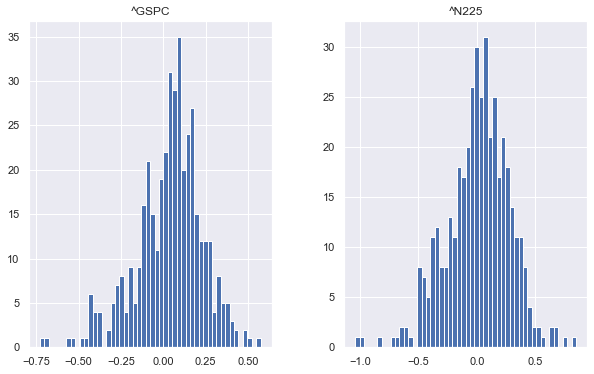

In [37]:
ret.hist(bins=50 , figsize=(10,6))
plt.show()